### Import modules

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [2]:
# searching files
all_files = os.listdir('dataset')

In [3]:
# combining info from all files into one dataframe
data = None

for f in all_files:
    data_f = pd.read_csv(f'dataset/{f}', sep=';')
    
    if data is None:
        data = data_f.copy()
        continue
    
    data = data.append(data_f, ignore_index=True)

### Data understanding

In [4]:
# checking first 5 rows
data.head()

,ДатаЧека,НомерЧека,ВидОперации,АЗСКод,ВидНоменклатуры,Карта,ОсновнаяКарта,НомерСтроки,НоменклатураКод,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,СуммаСкидкиДисконт,КассоваяСмена,ОператорКод,Unnamed: 19
0,03.12.2019 00:09:53,19411000000593,Начисление,1941,Сопутка,F012120C2A8619DB668CD4CFD5203246,NaN,1,231984,2,32,64,64,0,NaN,0,0,ea334934-154f-11ea-a8c1-00012eb194e7,Циркот І.Я.,NaN
1,03.12.2019 00:10:00,19411000000594,Начисление,1941,Нефтепродукты,F012120C2A8619DB668CD4CFD5203246,NaN,1,113355,"6,72","29,79",200,200,"0,19",NaN,0,0,ea334934-154f-11ea-a8c1-00012eb194e7,Циркот І.Я.,NaN
2,03.12.2019 00:10:11,37151000001268,Начисление,3715,Сопутка,3B3F9C6B22C900811F82E7679EAA23A5,NaN,1,235874,2,"14,9","29,8",29,0,NaN,0,0,fd0187f4-154f-11ea-b059-00012eb1a3ee,Явисенко Олена Олександрівна,NaN
3,03.12.2019 00:10:11,37151000001268,Начисление,3715,Сопутка,3B3F9C6B22C900811F82E7679EAA23A5,NaN,2,190362,1,17,17,17,0,NaN,0,0,fd0187f4-154f-11ea-b059-00012eb1a3ee,Явисенко Олена Олександрівна,NaN
4,03.12.2019 00:10:11,37151000001268,Начисление,3715,Сопутка,3B3F9C6B22C900811F82E7679EAA23A5,NaN,3,136787,1,37,37,37,0,NaN,0,0,fd0187f4-154f-11ea-b059-00012eb1a3ee,Явисенко Олена Олександрівна,NaN


In [5]:
# info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91903 entries, 0 to 91902
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ДатаЧека               91903 non-null  object 
 1   НомерЧека              91903 non-null  int64  
 2   ВидОперации            91903 non-null  object 
 3   АЗСКод                 91903 non-null  int64  
 4   ВидНоменклатуры        91903 non-null  object 
 5   Карта                  91901 non-null  object 
 6   ОсновнаяКарта          127 non-null    object 
 7   НомерСтроки            91903 non-null  int64  
 8   НоменклатураКод        91903 non-null  int64  
 9   Количество             91903 non-null  object 
 10  Цена                   91903 non-null  object 
 11  Сумма                  91903 non-null  object 
 12  Бонусы                 91903 non-null  object 
 13  СуммаСкидки            91903 non-null  object 
 14  УниверсальнаяАкцияКод  11445 non-null  float64
 15  Сп

### Preparing and filtering data

##### "ДатаЧека"

We will drop this info as it's not important for the model

In [6]:
# remove column
data = data.drop('ДатаЧека', axis=1)

##### "НомерЧека"

We also will drop this info as it's not important for the model

In [7]:
# remove column
data = data.drop('НомерЧека', axis=1)

##### "ВидОперации"

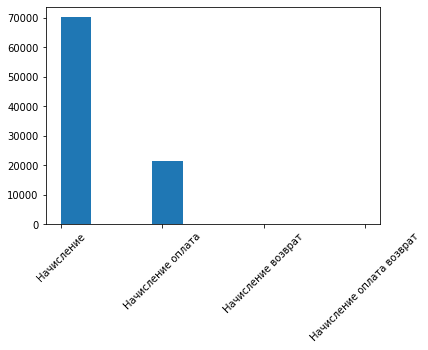

In [8]:
# visualizing data
plt.hist(data['ВидОперации'])
plt.xticks(rotation=45)
plt.show()

As we see we can drop rows with 'Начисление возврат' and 'Начисление оплата возврат' as there are very few data with these values

In [9]:
# filtering rows
data = data[data['ВидОперации']!='Начисление возврат']
data = data[data['ВидОперации']!='Начисление оплата возврат']

In [10]:
# normalize data for learning

# making list with names
list_names = list(data['ВидОперации'].unique())

# replacing string with [0,1]
data['ВидОперации'] = data['ВидОперации'].apply(lambda x:list_names.index(x))

##### "АЗСКод"

In [11]:
# checking unique values
list(data['АЗСКод'].unique())

[1941, 3715, 3508, 2617, 3530, 1933, 3041, 3516, 3108, 3027]

In [12]:
# normalize data for learning

# making list with names
list_stations = list(data['АЗСКод'].unique())

# replacing string with [0,1,..]
data['АЗСКод'] = data['АЗСКод'].apply(lambda x:list_stations.index(x))

##### "ВидНоменклатуры"

Most fraud cases happen with Gas purchasing, so we will leave only 'Нефтепродукты' rows and remove the entire column

In [13]:
# filtering rows
data = data[data['ВидНоменклатуры']=='Нефтепродукты']

# removing the column
data = data.drop('ВидНоменклатуры', axis=1)

##### "Карта"

In [14]:
# checking quantity of unique cards 
data['Карта'].describe()

count                                47384
unique                               20259
top       3A68C9A32E07603A1D5EA7CE1A800EB6
freq                                   119
Name: Карта, dtype: object

Only 20259 cards used among 47384 operations, this means that some cards were used several times.

Obviously a card number doesn't provide model with any useful information, we will replace the values with numbers of usage frequency for the card.

In [15]:
# grouping by cards
count_card = data.groupby('Карта').count()

#### *bonus

Checking the most frequently used card

In [16]:
# filter card with more than 100 operations
count_card[count_card['ВидОперации']>=100]

,ВидОперации,АЗСКод,ОсновнаяКарта,НомерСтроки,НоменклатураКод,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,СуммаСкидкиДисконт,КассоваяСмена,ОператорКод,Unnamed: 19
Карта,,,,,,,,,,,,,,,,
3A68C9A32E07603A1D5EA7CE1A800EB6,119,119,0,119,119,119,119,119,119,119,119,119,119,119,119,0


In [17]:
# showing operations with this card only
card_data = data[data['Карта']=='3A68C9A32E07603A1D5EA7CE1A800EB6']

# grouping by operations quantity per operator 
card_data.groupby('ОператорКод').count()

,ВидОперации,АЗСКод,Карта,ОсновнаяКарта,НомерСтроки,НоменклатураКод,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,СуммаСкидкиДисконт,КассоваяСмена,Unnamed: 19
ОператорКод,,,,,,,,,,,,,,,,
Візічканич Олена Василівна,7,7,7,0,7,7,7,7,7,7,7,7,7,7,7,0
Канюк Наталія Василівна,8,8,8,0,8,8,8,8,8,8,8,8,8,8,8,0
Мігалка Н.Ю.,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,0
Фера Радміла Іванівна,101,101,101,0,101,101,101,101,101,101,101,101,101,101,101,0


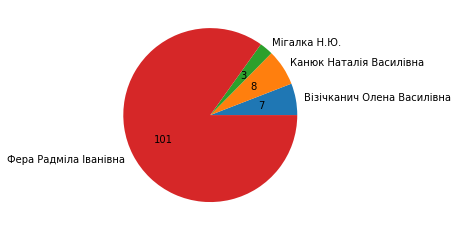

In [18]:
# visualizing result
pie_gr = card_data.groupby('ОператорКод').count()
plt.pie(pie_gr['ВидОперации'], labels=pie_gr.index, autopct=lambda pct: int(119*pct/100))
plt.show()

As we can see only one operator "Фера Радміла Іванівна" has done 101 operations with the same card

In [19]:
# replacing the values with numbers of usage frequency
data['Карта'] = data['Карта'].apply(lambda x:count_card.loc[x]['ВидОперации'])

##### "ОсновнаяКарта"

As we saw above this column has only 127 non-null values, so we can drop this column

In [20]:
data = data.drop('ОсновнаяКарта', axis=1)

##### "НомерСтроки"

We will drop this info as it's not important for the model

In [21]:
data = data.drop('НомерСтроки', axis=1)

##### "НоменклатураКод"

We will drop this column as we know that there are only gas products

In [22]:
data = data.drop('НоменклатураКод', axis=1)

##### "Количество", "Цена", "Сумма", "Бонусы", "СуммаСкидки"

These columns we will leave unchanged, just need to convert string into float number

In [23]:
# converting string values to float
data['Количество'] = data['Количество'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Цена'] = data['Цена'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Сумма'] = data['Сумма'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Бонусы'] = data['Бонусы'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['СуммаСкидки'] = data['СуммаСкидки'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))

##### "УниверсальнаяАкцияКод"

In [24]:
# checking unique values
list(data['УниверсальнаяАкцияКод'].unique())

[nan,
 3073.0,
 1980.0,
 3.0,
 4902.0,
 224.0,
 4439.0,
 3068.0,
 3067.0,
 4438.0,
 3865.0,
 294.0,
 4436.0,
 4900.0,
 3834.0,
 4952.0,
 5000.0,
 4441.0]

In [25]:
# replace NaN values
data['УниверсальнаяАкцияКод'] = data['УниверсальнаяАкцияКод'].fillna(0)

In [26]:
# normalize data for learning

# making list with names
list_disc_types = list(data['УниверсальнаяАкцияКод'].unique())

# replacing string with [0,1,..]
data['УниверсальнаяАкцияКод'] = data['УниверсальнаяАкцияКод'].apply(lambda x:list_disc_types.index(x))

##### "СписаноБонусов"

We will leave this unchanged

In [27]:
# converting unicode string to integer
data['СписаноБонусов'] = data['СписаноБонусов'].apply(lambda x:int(x.replace('\xa0', '')))

##### "СуммаСкидкиДисконт"

In [28]:
# checking for unique values
data['СуммаСкидкиДисконт'].unique()

array([0])

This column has only 0 values, we will drop it

In [29]:
data = data.drop('СуммаСкидкиДисконт', axis=1)

##### "КассоваяСмена"

This values will not help model, let's drop it

In [30]:
data = data.drop('КассоваяСмена', axis=1)

##### "ОператорКод"

In [31]:
# checking for unique values
data['ОператорКод'].unique()

array(['Циркот І.Я.', 'Лучко Євгенія Олександрівна',
       'Федів Ірина Василівна', 'Бушта Б. І.', 'Кочіш І.І.',
       'Косміна Катерина Нуцівна', 'Бороніна Ольга Анатоліївна',
       'Явисенко Олена Олександрівна', 'Гуля Євген Ігорович',
       'Каричковська Вікторія Іванівна', 'Візічканич Олена Василівна',
       'Вараховба Оксана Василівна', 'Тіщенко Р. В.',
       'Стефанів Оксана Іванівна', 'Хлистун Олена Вікторівна ',
       'Гаєва Л.Д.', 'Турусова Анастасія Володимирівна',
       'Явдошняк Тетяна Андріївна', 'Марко Михайло Юрійович',
       'Гендей М. М. ', 'Макарець О.В.', 'Шрамко Анфіса Петрівна',
       'Карасьова Ольга Вікторівна', 'Співак О.С.',
       'Буднік Олексій Геннадійович', 'Остафійчук.О.В',
       'Процишин Костянтин Петрович', 'Березенко Тетяна Олегівна',
       'Фера Радміла Іванівна', 'Устинський Аркадій Володимирович',
       'Бучинський Степан Олександрович',
       'Рибіцька Ганна Василівна                          ',
       'Петьовка Наталія Василівна', '

In [32]:
# normalize data for learning

# making list with names
list_operators = list(data['ОператорКод'].unique())

# replacing string with [0,1,..]
data['ОператорКод'] = data['ОператорКод'].apply(lambda x:list_operators.index(x))

Also dropping the last useless column 'Unnamed: 19'

In [33]:
data = data.drop('Unnamed: 19', axis=1)

##### Normalized dataset for learning model 

In [34]:
data.head(10)

,ВидОперации,АЗСКод,Карта,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,ОператорКод
1,0,0,11,6.72,29.79,200.00,200.0,0.19,0,0,0
6,0,0,3,7.25,30.79,200.00,0.0,23.23,1,0,0
7,1,2,8,16.24,30.79,349.40,1702.0,150.63,0,15063,1
8,1,2,7,13.00,30.79,328.00,1599.0,72.27,0,7200,1
9,1,2,1,55.00,30.79,1539.00,14997.0,154.45,0,15417,1
10,0,0,1,15.00,29.79,446.85,1500.0,0.00,0,0,0
14,0,3,34,10.08,29.79,300.00,1512.0,0.28,0,0,2
18,1,2,7,4.87,29.79,87.70,87.0,57.38,0,5738,1
20,0,5,4,18.97,29.79,565.00,2845.0,0.12,0,0,3
21,0,2,3,8.40,29.79,250.00,250.0,0.24,0,0,1


### Training model

In [35]:
# importing IsolationForest Algorithm
from sklearn.ensemble import IsolationForest

In [36]:
# creating model
clf = IsolationForest(random_state=0)

In [37]:
# fit model
clf.fit(data.values)

IsolationForest(random_state=0)

### Predicting and analyzing result

In [38]:
# making prediction on the dataset
prediction = clf.predict(data.values)

In [39]:
# replace 1 for inliers, -1 for outliers with 0 for inliers and 1 for outliers
anomaly = np.where(prediction==-1, 1, 0)

In [40]:
# adding column to data frame
data['Anomaly'] = anomaly

In [41]:
# showing result
data.head(10)

,ВидОперации,АЗСКод,Карта,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,ОператорКод,Anomaly
1,0,0,11,6.72,29.79,200.00,200.0,0.19,0,0,0,0
6,0,0,3,7.25,30.79,200.00,0.0,23.23,1,0,0,0
7,1,2,8,16.24,30.79,349.40,1702.0,150.63,0,15063,1,1
8,1,2,7,13.00,30.79,328.00,1599.0,72.27,0,7200,1,0
9,1,2,1,55.00,30.79,1539.00,14997.0,154.45,0,15417,1,1
10,0,0,1,15.00,29.79,446.85,1500.0,0.00,0,0,0,0
14,0,3,34,10.08,29.79,300.00,1512.0,0.28,0,0,2,0
18,1,2,7,4.87,29.79,87.70,87.0,57.38,0,5738,1,0
20,0,5,4,18.97,29.79,565.00,2845.0,0.12,0,0,3,0
21,0,2,3,8.40,29.79,250.00,250.0,0.24,0,0,1,0


In [45]:
# filter data only for anomaly operations
anomaly_data = data[data['Anomaly']==1]

In [59]:
# sorting by operator with the highest anomaly operations
anomaly_sorted = anomaly_data.groupby('ОператорКод').count().sort_values('Anomaly', ascending=False)

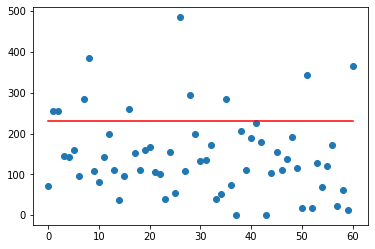

In [66]:
# visualizing result
plt.scatter(anomaly_sorted.index, anomaly_sorted['Anomaly'])
plt.plot([0,60], [230,230], color='red')
plt.show()

We can clearly see that in most cases anomaly frequency is below 230, only few are more than that

Let's filter only those operators who are above the line

In [70]:
# sort only for the highest frequency
anomaly_sorted = anomaly_sorted[anomaly_sorted['Anomaly']>230]
anomaly_sorted

,ВидОперации,АЗСКод,Карта,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,Anomaly
ОператорКод,,,,,,,,,,,
26,485,485,485,485,485,485,485,485,485,485,485
8,385,385,385,385,385,385,385,385,385,385,385
60,365,365,365,365,365,365,365,365,365,365,365
51,343,343,343,343,343,343,343,343,343,343,343
28,294,294,294,294,294,294,294,294,294,294,294
7,285,285,285,285,285,285,285,285,285,285,285
35,284,284,284,284,284,284,284,284,284,284,284
16,261,261,261,261,261,261,261,261,261,261,261
1,256,256,256,256,256,256,256,256,256,256,256


In [80]:
# getting list of operators names
names = []
for name_index in list(anomaly_sorted.index):
    names.append(list_operators[name_index])

In [84]:
# getting list of anomaly quantity
cases = list(anomaly_sorted['Anomaly'].values)

In [92]:
# making dataframe
anomaly_list = pd.DataFrame(data={'Operator':names, 'Anomaly operations':cases})

#### Result

In [93]:
# showing dataframe
anomaly_list

,Operator,Anomaly operations
0,Процишин Костянтин Петрович,485
1,Гуля Євген Ігорович,385
2,Распутний Артур Сергійович,365
3,Тищенко Р.В.,343
4,Фера Радміла Іванівна,294
5,Явисенко Олена Олександрівна,285
6,Співак Олексій Степанович,284
7,Турусова Анастасія Володимирівна,261
8,Лучко Євгенія Олександрівна,256
9,Федів Ірина Василівна,255


Here is the list of operators that has more that others suspicious operations